In [19]:
import numpy as np
# rng = np.random.default_rng(2020)

# Solve the n-Queen problem with Simulated Annealing.
#### What will be tested:
* That you understand every line of your code, not just copy from somewhere
* That your program compiles correctly
* Correctness of the program logic
* That the result is obtained in a reasonable time
#### What you need to do:
* Complete the `value` function
* Implement two search operators in `swap` and `permutation`
* Implement the replacement in `simulated_annealing`

In [20]:
class NQueenProblem:
    def __init__(self, grid, n, method) -> None:
        # grid is a 1D array, each element represents the position of a queen
        # In init state of the n-queen problem, if n = 8, grid = [0, 1, 2, 3, 4, 5, 6, 7]
        # represents the following state:
        # 1 0 0 0 0 0 0 0
        # 0 1 0 0 0 0 0 0
        # 0 0 1 0 0 0 0 0
        # 0 0 0 1 0 0 0 0
        # 0 0 0 0 1 0 0 0
        # 0 0 0 0 0 1 0 0
        # 0 0 0 0 0 0 1 0
        # 0 0 0 0 0 0 0 1
        # all queens in the initial state have conflicts with each other
        self.grid = grid
        self.n = n
        self.method = method

    def value(self):
        # TODO: evaluate the current state, return a scalar value
        # the evaluation function calculates the number of attacking pairs of queens on the board
        # return the number of conflicts
        conflicts = 0
        for i in range(self.grid.size - 1):
            for j in range(i + 1, self.grid.size):
                if self.grid[i] == self.grid[j] or abs(i - j) == abs(self.grid[i] - self.grid[j]):
                    conflicts += 1
        return conflicts


    def local_search(self):
        # using the method to generate a new grid
        new_grid = self.method(self.grid, self.n)
        return NQueenProblem(new_grid, self.n, self.method)

    def print_grid(self):
        matrix = np.zeros((self.n, self.n))
        for i in range(self.n):
            matrix[self.grid[i], i] = 1
        for i in range(self.n):
            for j in range(self.n):
                print(int(matrix[i, j]), end=' ')
            print()


#### Check the correctness of the value function:

In [21]:
grid = np.array([7,4,6,1,5,3,2,0])
problem = NQueenProblem(grid, 8, None)
problem.print_grid()
problem.value()

0 0 0 0 0 0 0 1 
0 0 0 1 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 0 1 0 0 
0 1 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 
0 0 1 0 0 0 0 0 
1 0 0 0 0 0 0 0 


5

In [22]:
import math
import random
def simulated_annealing(initial:NQueenProblem, schedule, halt, log_interval=200):
    state = initial
    t = 0           # time step
    T = schedule(t) # temperature
    f = [state.value()] # a recording of values
    while not halt(T):
        T = schedule(t)
        new_state = state.local_search()
        new_value = new_state.value()

        # TODO: implement the replacement here
        if new_value < state.value():
            state = new_state
        else:
            p = math.exp((state.value() - new_value) / T)
            if random.random() < p:
                state = new_state

        f.append(state.value())

        # update time and temperature
        if t % log_interval == 0:
            print(f"step {t}: T={T}, current_value={state.value()}")
        if new_value == 0:
            break
        t += 1
        T = schedule(t)
    print(f"step {t}: T={T}, current_value={state.value()}")
    return state, f

In [23]:
# Operator 1  
def swap(grid, n):
     # TODO: swap two positions in the grid
     i,j = random.sample(range(n), 2)
     grid[i], grid[j] = grid[j], grid[i]
     return grid

# Operator 2 
def permutation(grid, n):
     # TODO: random shuffling sequences(grid)
     random.shuffle(grid)
     return grid

In [24]:
#Run the simulated annealing algorithm for the N-Queens problem using Operator 1:swap and observe the results
rng = np.random.default_rng(200)
solution, record = simulated_annealing(
    # random
    initial=NQueenProblem(np.arange(12), 12, swap),
    schedule=lambda t: 0.999**t,
    halt=lambda T: T<1e-7,
    log_interval=100
)
solution.print_grid()
solution.grid, solution.value()

step 0: T=1.0, current_value=48
step 100: T=0.9047921471137089, current_value=8
step 200: T=0.8186488294786356, current_value=10
step 300: T=0.7407070321560992, current_value=6
step 400: T=0.6701859060067401, current_value=5
step 500: T=0.6063789448611847, current_value=7
step 600: T=0.5486469074854967, current_value=7
step 700: T=0.49641141343109896, current_value=6
step 800: T=0.4491491486100751, current_value=7
step 900: T=0.4063866225452042, current_value=7
step 1000: T=0.36769542477096373, current_value=5
step 1100: T=0.3326879328624075, current_value=7
step 1200: T=0.3010134290933991, current_value=6
step 1300: T=0.2723545868194768, current_value=7
step 1400: T=0.2464242913846615, current_value=6
step 1500: T=0.2229627637029021, current_value=6
step 1600: T=0.20173495769715533, current_value=8
step 1700: T=0.18252820552270244, current_value=6
step 1800: T=0.16515008698369826, current_value=8
step 1900: T=0.14942650179799616, current_value=10
step 2000: T=0.13519992539749945, curr

(array([ 8,  4,  2,  6,  3,  7, 11,  0,  1, 10,  9,  5]), 6)

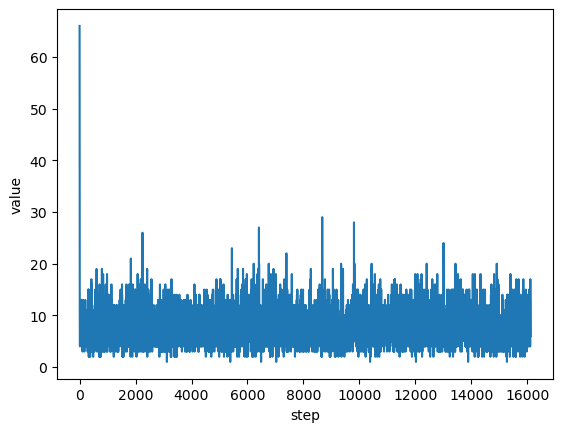

In [25]:
import matplotlib.pyplot as plt

plt.plot(record)
plt.xlabel('step')
plt.ylabel('value')
plt.show()

In [26]:
#Run the simulated annealing algorithm for the N-Queens problem using Operator 1:swap and observe the results
#Compare the effects of the two Operators and attempt to explain the differences.
solution, record = simulated_annealing(
    initial=NQueenProblem(np.arange(12), 12, permutation),
    schedule=lambda t: 0.999**t,
    halt=lambda T: T<1e-7,
    log_interval=200
)
solution.print_grid()
solution.grid, solution.value()

step 0: T=1.0, current_value=7
step 200: T=0.8186488294786356, current_value=2
step 400: T=0.6701859060067401, current_value=12
step 600: T=0.5486469074854967, current_value=12
step 800: T=0.4491491486100751, current_value=4
step 1000: T=0.36769542477096373, current_value=7
step 1200: T=0.3010134290933991, current_value=4
step 1400: T=0.2464242913846615, current_value=7
step 1600: T=0.20173495769715533, current_value=7
step 1800: T=0.16515008698369826, current_value=8
step 2000: T=0.13519992539749945, current_value=8
step 2200: T=0.11068126067226176, current_value=3
step 2400: T=0.09060908449456684, current_value=6
step 2600: T=0.07417702096160793, current_value=4
step 2800: T=0.060724931384432544, current_value=8
step 3000: T=0.04971239399803616, current_value=8
step 3200: T=0.04069699315707305, current_value=10
step 3400: T=0.033316545811337896, current_value=5
step 3600: T=0.027274551230723105, current_value=13
step 3800: T=0.02232827943958655, current_value=9
step 4000: T=0.0182790

(array([ 4,  5,  2,  8,  1, 10,  3, 11,  9,  0,  6,  7]), 9)

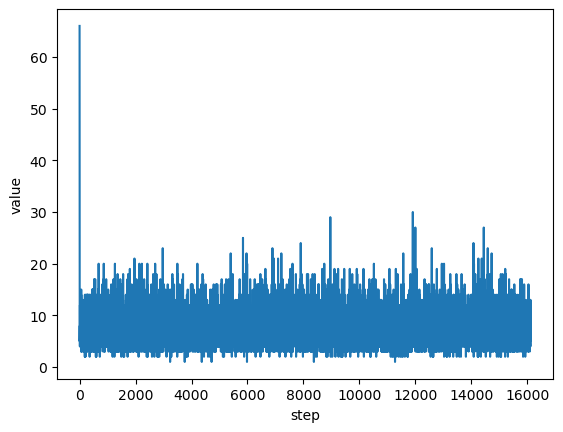

In [27]:
plt.plot(record)
plt.xlabel('step')
plt.ylabel('value')
plt.show()